In [334]:
import pandas as pd
%matplotlib inline

In [335]:
HiC_chr1=pd.read_csv('/home/alberto/DATA/GMUDOsOdieciK/chr1.txt',sep='\t',header=None,names=['win1', 'win2', 'contactP'])

In [336]:
HiC_chr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61804782 entries, 0 to 61804781
Data columns (total 3 columns):
win1        int64
win2        int64
contactP    float64
dtypes: float64(1), int64(2)
memory usage: 1.4 GB


In [337]:
sortHc=HiC_chr1.set_index(['win1','win2'])

In [338]:
sortHc.sort_index(inplace=True)

In [339]:
sortHc.head()

contactP
win1  win2              
0     87650000       NaN
10000 10000     6.866875
      50000     1.117720
      230000    1.490917
      240000    6.866513

In [340]:
sortHc.contactP.describe()

count    6.180021e+07
mean     4.468442e+00
std      7.912780e+00
min      1.765080e-02
25%      1.514258e+00
50%      2.884874e+00
75%      5.999492e+00
max      8.632503e+03
Name: contactP, dtype: float64

In [341]:
sortHc.reset_index(inplace=True)

In [342]:
sortHc['distance']=sortHc.apply(lambda x: abs(x['win1']-x['win2']),axis=1 )

In [343]:
sortHc.head()

,win1,win2,contactP,distance
0,0,87650000,NaN,87650000.0
1,10000,10000,6.866875,0.0
2,10000,50000,1.117720,40000.0
3,10000,230000,1.490917,220000.0
4,10000,240000,6.866513,230000.0


In [344]:
tempHc=sortHc.rename(columns={'win1':'win2','win2':'win1'})

In [345]:
tempHc.head()

,win2,win1,contactP,distance
0,0,87650000,NaN,87650000.0
1,10000,10000,6.866875,0.0
2,10000,50000,1.117720,40000.0
3,10000,230000,1.490917,220000.0
4,10000,240000,6.866513,230000.0


In [346]:
sortHc[['contactP','distance']].corr()

,contactP,distance
contactP,1.000000,0.373676
distance,0.373676,1.000000


In [347]:
Big=pd.concat([sortHc,tempHc])

In [348]:
Big.nlargest(10,columns='contactP')

,contactP,distance,win1,win2
7145156,8632.5030,129350000.0,16900000,146250000
7145156,8632.5030,129350000.0,146250000,16900000
40075968,7666.2260,22840000.0,121440000,144280000
40075968,7666.2260,22840000.0,144280000,121440000
40126322,7665.8690,5910000.0,143680000,149590000
40126322,7665.8690,5910000.0,149590000,143680000
40176609,7463.2740,62470000.0,144020000,206490000
40176609,7463.2740,62470000.0,206490000,144020000
40039267,7121.7324,85450000.0,121120000,206570000
40039267,7121.7324,85450000.0,206570000,121120000


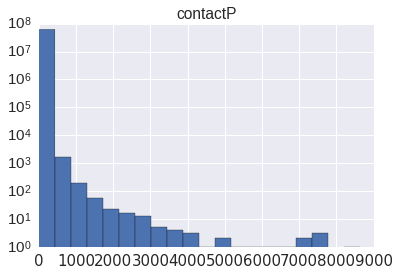

In [349]:
sortHc.hist(column='contactP',log=True,bins=20,xlabelsize=15,ylabelsize=15);

In [350]:
def openGC(path,resolution):
    import gzip
    def window(ising,lung):
        L=len(ising)

        GCdens=[]
        distances = range((L/lung)+1)
        for i in distances:
            temp=ising[i*lung:(i+1)*lung]

            NP=temp.count('+')
            NM=temp.count('-')
            if NP+NM != 0: 
                NPmed=NP/float(NP+NM)
            else: NPmed = float('nan')
            GCdens.append(NPmed)
        #print len(GCdens)
        return GCdens

    path
    with gzip.open(path, 'rb') as f:
        ising = f.read()

    isingN = '\n'.join(ising.split('\n')[1:])
    ising=isingN.replace('\n','').replace('\r','')
    ising=ising.replace('A','-').replace('T','-').replace('G','+').replace('C','+').replace('a','-').replace('t','-').replace('g','+').replace('c','+')
    #L=len(ising)

    muVec=window(ising,resolution)   #change resolution here
    return muVec

In [351]:
ch1_fa=openGC('/home/alberto/Downloads/HI-C/Reference Genomes/hg19/chr1.fa.gz',10**4)

In [352]:
GC=pd.DataFrame(ch1_fa,columns=['GC_content']).reset_index()

In [353]:
GC.head()

,index,GC_content
0,0,NaN
1,1,0.5923
2,2,0.5174
3,3,0.4712
4,4,0.3561


In [354]:
GC['index']=GC['index']*5*10**5

In [355]:
GC.rename(columns ={'index': 'window'},inplace=True)

In [356]:
GC.head()

,window,GC_content
0,0,NaN
1,500000,0.5923
2,1000000,0.5174
3,1500000,0.4712
4,2000000,0.3561


In [357]:
Big.head()

,contactP,distance,win1,win2
0,NaN,87650000.0,0,87650000
1,6.866875,0.0,10000,10000
2,1.117720,40000.0,10000,50000
3,1.490917,220000.0,10000,230000
4,6.866513,230000.0,10000,240000


In [358]:
Big.drop_duplicates(inplace=True)

In [359]:
sortHc=Big

In [360]:
tmpMerge=pd.merge(sortHc,GC,left_on='win1',right_on='window',left_index=True)

In [361]:
tmpMerge.rename(columns ={'GC_content': 'GC_content1'},inplace=True)

In [362]:
df=pd.merge(tmpMerge,GC,left_on='win2',right_on='window',left_index=True)

In [363]:
df.rename(columns ={'GC_content': 'GC_content2'},inplace=True)

In [364]:
cleanDf=df.drop(['window_x','window_y'], axis=1)

In [365]:
cleanDf['distance']=cleanDf['distance'].astype(int)

In [366]:
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50169 entries, 2 to 298
Data columns (total 6 columns):
contactP       50169 non-null float64
distance       50169 non-null int64
win1           50169 non-null int64
win2           50169 non-null int64
GC_content1    47591 non-null float64
GC_content2    47591 non-null float64
dtypes: float64(3), int64(3)
memory usage: 2.7 MB


In [367]:
cleanDf['GC_diff']=cleanDf.apply(lambda x: abs(x['GC_content1']-x['GC_content2']),axis=1 )

In [368]:
cleanDf.head()

,contactP,distance,win1,win2,GC_content1,GC_content2,GC_diff
2,1.385133,0,1000000,1000000,0.5174,0.5174,0.0000
2,1.698856,500000,1500000,1000000,0.4712,0.5174,0.0462
2,0.849260,1500000,2500000,1000000,0.3654,0.5174,0.1520
2,0.903456,2000000,3000000,1000000,0.3331,0.5174,0.1843
2,0.348514,3000000,4000000,1000000,0.3707,0.5174,0.1467


In [369]:
cleanDf[['distance','contactP','GC_diff']].corr()

,distance,contactP,GC_diff
distance,1.000000,0.414360,0.224656
contactP,0.414360,1.000000,0.096439
GC_diff,0.224656,0.096439,1.000000


In [370]:
cleanDf.set_index(['GC_content1','GC_content2']).sort_index().reset_index()

,GC_content1,GC_content2,contactP,distance,win1,win2,GC_diff
0,0.3281,0.328100,1.044584,0,29500000,29500000,0.000000
1,0.3281,0.329500,1.592333,10000000,29500000,19500000,0.001400
2,0.3281,0.344100,0.535766,2500000,29500000,32000000,0.016000
3,0.3281,0.344100,2.469438,12500000,29500000,17000000,0.016000
4,0.3281,0.347600,1.379267,23500000,29500000,6000000,0.019500
5,0.3281,0.351300,1.339852,24000000,29500000,5500000,0.023200
6,0.3281,0.356100,4.385344,27500000,29500000,2000000,0.028000
7,0.3281,0.362500,0.848759,11500000,29500000,18000000,0.034400
8,0.3281,0.362600,1.403525,1500000,29500000,31000000,0.034500
9,0.3281,0.365400,5.511642,27000000,29500000,2500000,0.037300


In [371]:
import numpy as np

In [372]:
ranges=np.linspace(min(cleanDf.GC_content1),(max(cleanDf.GC_content1)-.05),26)

In [373]:
space=ranges[1]-ranges[0]

In [374]:
print ranges

[ 0.3281  0.3412  0.3543  0.3674  0.3805  0.3936  0.4067  0.4198  0.4329
  0.446   0.4591  0.4722  0.4853  0.4984  0.5115  0.5246  0.5377  0.5508
  0.5639  0.577   0.5901  0.6032  0.6163  0.6294  0.6425  0.6556]


In [375]:
Matrix=cleanDf.groupby([pd.cut(cleanDf["GC_content1"], ranges),pd.cut(cleanDf["GC_content2"], ranges)]).contactP.count()

In [376]:
Matrix=Matrix.reset_index()

In [377]:
Matrix.head()

,GC_content1,GC_content2,contactP
0,"(0.328, 0.341]","(0.328, 0.341]",2
1,"(0.328, 0.341]","(0.341, 0.354]",6
2,"(0.328, 0.341]","(0.354, 0.367]",6
3,"(0.328, 0.341]","(0.367, 0.38]",10
4,"(0.328, 0.341]","(0.38, 0.394]",4


In [378]:
GC_hist=cleanDf.GC_content1.append(cleanDf.GC_content2,ignore_index=True)

In [379]:
GC_hist.head()

0    0.5174
1    0.4712
2    0.3654
3    0.3331
4    0.3707
dtype: float64

In [380]:
Tot=len(GC_hist)
pro=GC_hist.groupby(pd.cut(GC_hist, ranges)).apply(lambda x: x.count()/float(Tot))

In [381]:
cleanDf.head()

,contactP,distance,win1,win2,GC_content1,GC_content2,GC_diff
2,1.385133,0,1000000,1000000,0.5174,0.5174,0.0000
2,1.698856,500000,1500000,1000000,0.4712,0.5174,0.0462
2,0.849260,1500000,2500000,1000000,0.3654,0.5174,0.1520
2,0.903456,2000000,3000000,1000000,0.3331,0.5174,0.1843
2,0.348514,3000000,4000000,1000000,0.3707,0.5174,0.1467


In [382]:
probability=pro.reset_index()

In [383]:
probability.rename(columns={'index':'GC_content',0:'interval_prob'},inplace=True)

In [384]:
tmp=pd.merge(Matrix,probability,left_on='GC_content1',right_on='GC_content')

In [385]:
tmp.rename(columns={'interval_prob':'interval_prob1'},inplace=True)

In [386]:
final=pd.merge(tmp,probability,left_on='GC_content2',right_on='GC_content')

In [387]:
final.rename(columns={'interval_prob':'interval_prob2'},inplace=True)

In [388]:
final=final.drop(['GC_content_x','GC_content_y'], axis=1)

In [389]:
final.head()

,GC_content1,GC_content2,contactP,interval_prob1,interval_prob2
0,"(0.328, 0.341]","(0.328, 0.341]",2,0.003528,0.003528
1,"(0.341, 0.354]","(0.328, 0.341]",6,0.012617,0.003528
2,"(0.354, 0.367]","(0.328, 0.341]",6,0.012936,0.003528
3,"(0.367, 0.38]","(0.328, 0.341]",10,0.013415,0.003528
4,"(0.38, 0.394]","(0.328, 0.341]",4,0.013116,0.003528


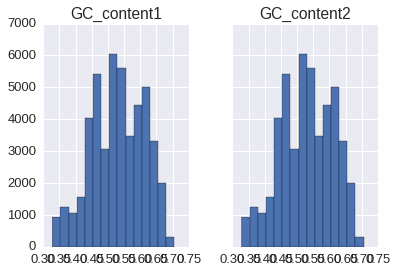

In [390]:
cleanDf.hist(column=['GC_content1','GC_content2'],bins=15,sharey=True);

In [391]:
len(cleanDf.GC_content1)==len(cleanDf.GC_content2)

True

In [392]:
len(GC_hist)

100338

# All gc contents revealed

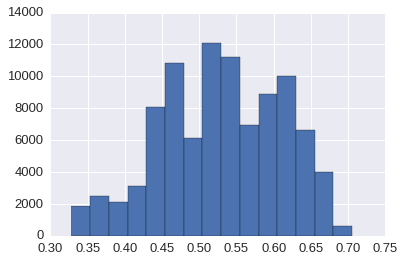

In [393]:
GC_hist.hist(bins=15);

In [394]:
GC_hist.head()

0    0.5174
1    0.4712
2    0.3654
3    0.3331
4    0.3707
dtype: float64

In [395]:
len(GC_hist)

100338

In [396]:
pro.sum()

0.90246965257429879

In [397]:
import seaborn as sns
import numpy as np

In [398]:
Matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 3 columns):
GC_content1    625 non-null category
GC_content2    625 non-null category
contactP       625 non-null int64
dtypes: category(2), int64(1)
memory usage: 7.0 KB


In [399]:
result = Matrix.pivot(index='GC_content1', columns='GC_content2', values='contactP')

In [400]:
result

GC_content2,"(0.328, 0.341]","(0.341, 0.354]","(0.354, 0.367]","(0.367, 0.38]","(0.38, 0.394]","(0.394, 0.407]","(0.407, 0.42]","(0.42, 0.433]","(0.433, 0.446]","(0.446, 0.459]",...,"(0.525, 0.538]","(0.538, 0.551]","(0.551, 0.564]","(0.564, 0.577]","(0.577, 0.59]","(0.59, 0.603]","(0.603, 0.616]","(0.616, 0.629]","(0.629, 0.642]","(0.642, 0.656]"
GC_content1,,,,,,,,,,,,,,,,,,,,,
"(0.328, 0.341]",2,6,6,10,4,4,9,10,6,11,...,6,10,2,3,7,6,5,5,6,6
"(0.341, 0.354]",6,20,18,23,14,7,24,32,20,42,...,28,31,11,12,19,17,22,24,25,21
"(0.354, 0.367]",6,18,20,20,13,9,23,34,20,35,...,32,30,16,14,13,24,14,30,25,16
"(0.367, 0.38]",10,23,20,24,18,7,27,49,23,36,...,23,36,16,10,16,16,19,31,29,25
"(0.38, 0.394]",4,14,13,18,19,10,21,37,19,36,...,28,31,14,14,22,26,30,22,22,21
"(0.394, 0.407]",4,7,9,7,10,3,15,14,11,24,...,23,10,8,8,12,7,7,13,12,7
"(0.407, 0.42]",9,24,23,27,21,15,31,46,37,59,...,55,42,19,27,25,25,32,53,23,31
"(0.42, 0.433]",10,32,34,49,37,14,46,76,60,85,...,79,80,39,37,55,57,56,88,56,54
"(0.433, 0.446]",6,20,20,23,19,11,37,60,78,92,...,120,92,45,45,75,51,47,75,45,45


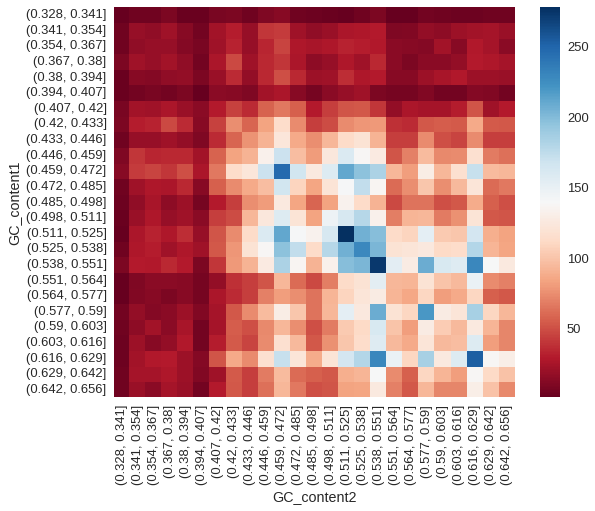

In [401]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
plt.figure(figsize=(9,7))
sns.heatmap(result, annot=False, cmap='RdBu');


In [402]:
final.head()

,GC_content1,GC_content2,contactP,interval_prob1,interval_prob2
0,"(0.328, 0.341]","(0.328, 0.341]",2,0.003528,0.003528
1,"(0.341, 0.354]","(0.328, 0.341]",6,0.012617,0.003528
2,"(0.354, 0.367]","(0.328, 0.341]",6,0.012936,0.003528
3,"(0.367, 0.38]","(0.328, 0.341]",10,0.013415,0.003528
4,"(0.38, 0.394]","(0.328, 0.341]",4,0.013116,0.003528


In [403]:
from scipy import stats

In [404]:
TOT=final.contactP.sum()

In [405]:
final['prova']=final.apply(lambda x: stats.binom.sf(x.contactP,TOT,(x.interval_prob1 *x.interval_prob2)),axis=1)

In [406]:
zzz=final.interval_prob1*final.interval_prob2

In [407]:
zzz.sum()

0.81445147381757577

In [408]:
final.contactP.sum()*0.037192*0.037192

56.717189158592006

In [409]:
final

,GC_content1,GC_content2,contactP,interval_prob1,interval_prob2,prova
0,"(0.328, 0.341]","(0.328, 0.341]",2,0.003528,0.003528,1.518598e-02
1,"(0.341, 0.354]","(0.328, 0.341]",6,0.012617,0.003528,2.771709e-03
2,"(0.354, 0.367]","(0.328, 0.341]",6,0.012936,0.003528,3.174122e-03
3,"(0.367, 0.38]","(0.328, 0.341]",10,0.013415,0.003528,6.285829e-06
4,"(0.38, 0.394]","(0.328, 0.341]",4,0.013116,0.003528,4.386130e-02
5,"(0.394, 0.407]","(0.328, 0.341]",4,0.006578,0.003528,2.969250e-03
6,"(0.407, 0.42]","(0.328, 0.341]",9,0.019474,0.003528,6.907118e-04
7,"(0.42, 0.433]","(0.328, 0.341]",10,0.031613,0.003528,7.463206e-03
8,"(0.433, 0.446]","(0.328, 0.341]",6,0.033188,0.003528,2.093263e-01
9,"(0.446, 0.459]","(0.328, 0.341]",11,0.046303,0.003528,4.086141e-02


In [410]:
result = final.pivot(index='GC_content1', columns='GC_content2', values='prova')

In [411]:
result

GC_content2,"(0.328, 0.341]","(0.341, 0.354]","(0.354, 0.367]","(0.367, 0.38]","(0.38, 0.394]","(0.394, 0.407]","(0.407, 0.42]","(0.42, 0.433]","(0.433, 0.446]","(0.446, 0.459]",...,"(0.525, 0.538]","(0.538, 0.551]","(0.551, 0.564]","(0.564, 0.577]","(0.577, 0.59]","(0.59, 0.603]","(0.603, 0.616]","(0.616, 0.629]","(0.629, 0.642]","(0.642, 0.656]"
GC_content1,,,,,,,,,,,,,,,,,,,,,
"(0.328, 0.341]",0.015186,2.771709e-03,0.003174,6.285829e-06,0.043861,0.002969,0.000691,7.463206e-03,0.209326,0.040861,...,7.824794e-01,3.662226e-01,9.000562e-01,7.406078e-01,4.451898e-01,3.237658e-01,5.252929e-01,8.754418e-01,2.953062e-01,2.302532e-01
"(0.341, 0.354]",0.002772,5.191143e-06,0.000073,3.337470e-07,0.004346,0.023173,0.000053,1.918827e-04,0.206387,0.000286,...,7.125587e-01,6.763514e-01,9.659447e-01,9.093170e-01,9.061027e-01,6.947645e-01,3.447043e-01,9.029182e-01,8.154171e-02,1.805489e-01
"(0.354, 0.367]",0.003174,7.346742e-05,0.000011,1.830257e-05,0.012204,0.003242,0.000192,6.656157e-05,0.238350,0.017849,...,4.935469e-01,7.818203e-01,7.463246e-01,8.218183e-01,9.974402e-01,1.795851e-01,9.377005e-01,6.260771e-01,1.004505e-01,6.375211e-01
"(0.367, 0.38]",0.000006,3.337470e-07,0.000018,2.787692e-07,0.000188,0.031556,0.000008,1.418196e-10,0.112610,0.018628,...,9.672850e-01,4.874174e-01,7.940587e-01,9.831962e-01,9.885724e-01,8.447409e-01,7.039295e-01,6.371923e-01,2.814035e-02,6.700423e-02
"(0.38, 0.394]",0.043861,4.346451e-03,0.012204,1.884198e-04,0.000049,0.001108,0.001244,7.880293e-06,0.335627,0.013762,...,7.814978e-01,7.527570e-01,8.867175e-01,8.363613e-01,8.109725e-01,1.034758e-01,3.387872e-02,9.711969e-01,2.795364e-01,2.286787e-01
"(0.394, 0.407]",0.002969,2.317335e-02,0.003242,3.155592e-02,0.001108,0.104575,0.000120,2.804828e-02,0.192245,0.001176,...,5.035508e-02,9.679075e-01,6.585942e-01,5.954388e-01,6.012540e-01,8.113349e-01,8.471710e-01,7.654141e-01,2.114253e-01,7.018384e-01
"(0.407, 0.42]",0.000691,5.259184e-05,0.000192,7.833358e-06,0.001244,0.000120,0.000169,6.872702e-05,0.020622,0.000304,...,1.768437e-01,9.285761e-01,9.719676e-01,5.116996e-01,9.932406e-01,8.255440e-01,4.626562e-01,2.506140e-01,8.748437e-01,2.079553e-01
"(0.42, 0.433]",0.007463,1.918827e-04,0.000067,1.418196e-10,0.000008,0.028048,0.000069,3.300244e-07,0.005619,0.000928,...,4.972514e-01,7.183240e-01,8.847662e-01,8.749575e-01,8.912464e-01,1.395022e-01,2.691982e-01,1.526516e-01,1.178715e-01,6.706916e-02
"(0.433, 0.446]",0.209326,2.063870e-01,0.238350,1.126102e-01,0.335627,0.192245,0.020622,5.618888e-03,0.000003,0.000239,...,7.006110e-05,3.996143e-01,7.365398e-01,6.008457e-01,2.012566e-01,5.362596e-01,8.369896e-01,8.033446e-01,7.605430e-01,5.514573e-01


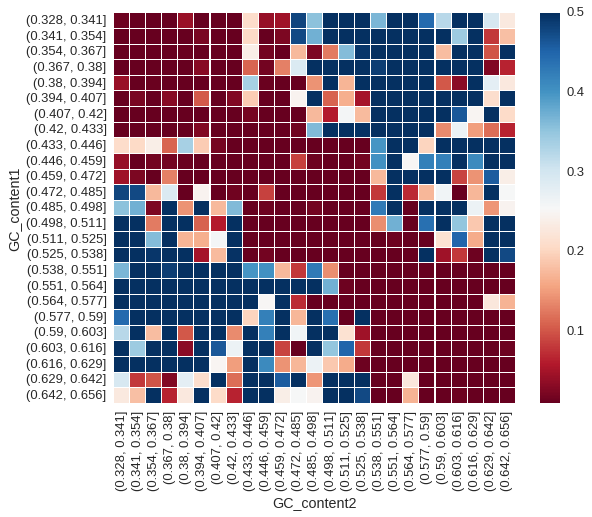

In [412]:
sns.set(font_scale=1.3)
plt.figure(figsize=(9,7))
sns.heatmap(result, annot=False, cmap='RdBu',linewidths=.1,vmax=.5,vmin=0.01);